# 1. Introduction to the Environment

The "Puddle World" environment provides an interface for reinforcement learning experiments. It features puddles and challenges agents to navigate to specified goal positions while avoiding the puddles with larger negative rewards.
You can access key details like starting position, goal location, and action noise levels. By printing these attributes, you can gain insights into the environment's layout and develop strategies for training reinforcement learning algorithms effectively within the Puddle World domain.
Here is the default Puddle World configuration inspired by the [original paper](/http://incompleteideas.net/papers/sutton-96.pdf):

**Actions**

There are four actions: up, down, right, and left.
Each action moves approximately 0.05 in these directions. For the case where an action would take the agent out of the screen limits, the action does not move the agent instead.

A random gaussian noise with standard deviation 0.01 is also added to the motion along both dimensions.

**Reward**

The reward is -1 for each time step, plus some additional penalty if the agent gets into the puddle.
The penalty is -400 times the distance into the puddle (distance to the nearest edge).


**Puddle Positions**

The puddles's top-left position is [0.  , 0.85] and [0.35, 0.9] respectively, and the width and height for them is [0.55, 0.2 ] and [0.2, 0.6].

**Start Position**

The agent starts each episode at [0.2, 0.4].

**Goal Position**

The episode ends succesfully if the agent reaches [1.0, 1.0] which is the goal position.


**RL State**

State of the enviornent can be defined in different ways. In one basic way, we can obtain it via a tuabtual numbers of current position of agent. In more advance way, we will utulize it, we will use CNN networks to extract features from images of playing and interaction with environment.

In [1]:

import gymnasium as gym
import gym_puddle

from stable_baselines3 import DQN
from stable_baselines3.dqn import CnnPolicy as DQNCnnPolicy
import time
import json

import matplotlib.pyplot as plt
import numpy as np

from IPython import display
import pyvirtualdisplay
import cv2

Here are the printed details about the environment.

In [3]:
env = gym.make("PuddleWorld-v0")

print("start position:", env.get_wrapper_attr("start"))
print("goal position:", env.get_wrapper_attr("goal"))
print("goal threshold:", env.get_wrapper_attr("goal_threshold"))
print("action noise:", env.get_wrapper_attr("noise"))
print("agent's thrust:", env.get_wrapper_attr("thrust"))
print("puddle top left positions:", env.get_wrapper_attr("puddle_top_left"))
print("puddle widths and heights:", env.get_wrapper_attr("puddle_width"))
print("action space:", env.get_wrapper_attr("actions"))
print("observation space:", env.get_wrapper_attr("observation_space"))

start position: [0.2 0.4]
goal position: [1. 1.]
goal threshold: 0.1
action noise: 0.01
agent's thrust: 0.05
puddle top left positions: [array([0.  , 0.85]), array([0.35, 0.9 ])]
puddle widths and heights: [array([0.55, 0.2 ]), array([0.2, 0.6])]
action space: [array([-0.05,  0.  ]), array([0.05, 0.  ]), array([ 0.  , -0.05]), array([0.  , 0.05])]
observation space: Box(0, 255, (3, 156, 156), uint8)


Here is the visualization of the environment for the default configuration.

In [4]:
#some functions to help the visualization and interaction wit the environment

def visualize(frames, video_name = "video.mp4"):
    # Saves the frames as an mp4 video using cv2
    video_path = video_name
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    video_writer = cv2.VideoWriter(video_path, fourcc, 30, (width, height))
    for frame in frames:
        video_writer.write(frame)
    video_writer.release()

def online_rendering(image):
    #Visualize one frame of the image in a display
    ax.axis('off')
    img_with_frame = np.zeros((image.shape[0]+2, image.shape[1]+2, 3), dtype=np.uint8)
    img_with_frame[1:-1, 1:-1, :] = image
    ax.imshow(img_with_frame)
    display.display(plt.gcf())
    display.clear_output(wait=True)


def prepare_display():
    #Prepares display for onine rendering of the frames in the game
    _display = pyvirtualdisplay.Display(visible=False,size=(1400, 900))
    _ = _display.start()
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.axis('off')


def get_action():
    action = None
    while action not in ["w", "a", "s", "d", "W", "A", "S", "D"]:
        action = input("Enter action (w/a/s/d): ")
    if action == "w":
        return 3
    elif action == "a":
        return 0
    elif action == "s":
        return 2
    elif action == "d":
        return 1


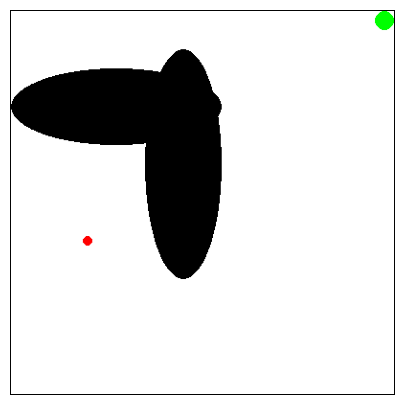

In [5]:
obs, info = env.reset()
image = env.render()
fig, ax = plt.subplots(figsize=(5, 5))
online_rendering(cv2.resize(image, (400,400)))

## 1.1 Accessing Different Environment Configurations

Your task is to train an agent that can generalize well across different provided configurations of the environment. Each of these configurations feature different positions for puddles, which makes it challenging for the agent to find the most rewarding path to the goal.


You can find these configurations in the `env_configs` folder of the repository. In order to access each version of the environment, you can provide the `.json` file indicating the environment details, and intitialize the puddle world as follows:
(Note that if you are using colab, you should upload the configs to the files section of the colab)
The puddle positions are different in these configurations, but other aspects of the environment remain the same.

### Puddle Env with Config 1

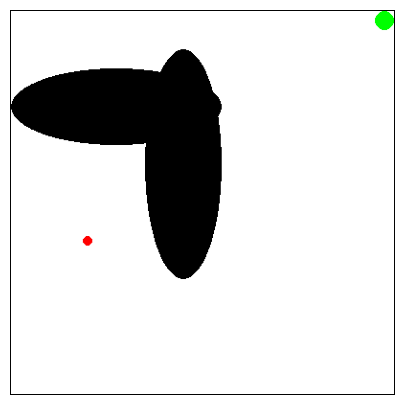

In [6]:
json_file = f"gym_puddle/env_configs/pw1.json"

with open(json_file) as f:
  env_setup = json.load(f)

env = gym.make(
  "PuddleWorld-v0",
  start=env_setup["start"],
  goal=env_setup["goal"],
  goal_threshold=env_setup["goal_threshold"],
  noise=env_setup["noise"],
  thrust=env_setup["thrust"],
  puddle_top_left=env_setup["puddle_top_left"],
  puddle_width=env_setup["puddle_width"],
)

obs, info = env.reset()
image = env.render()
fig, ax = plt.subplots(figsize=(5, 5))
online_rendering(np.transpose(image, (0, 1, 2)))

### Puddle Env with Config 2

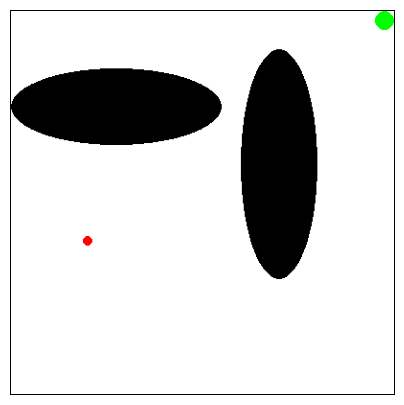

In [7]:
json_file = f"gym_puddle/env_configs/pw2.json"

with open(json_file) as f:
  env_setup = json.load(f)

env = gym.make(
  "PuddleWorld-v0",
  start=env_setup["start"],
  goal=env_setup["goal"],
  goal_threshold=env_setup["goal_threshold"],
  noise=env_setup["noise"],
  thrust=env_setup["thrust"],
  puddle_top_left=env_setup["puddle_top_left"],
  puddle_width=env_setup["puddle_width"],
)

obs, info = env.reset()
image = env.render()
fig, ax = plt.subplots(figsize=(5, 5))
online_rendering(np.transpose(image, (0, 1, 2)))

### Puddle Env with Config 3

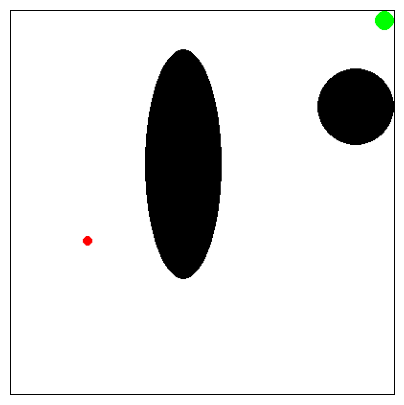

In [8]:
json_file = f"gym_puddle/env_configs/pw3.json"

with open(json_file) as f:
  env_setup = json.load(f)

env = gym.make(
  "PuddleWorld-v0",
  start=env_setup["start"],
  goal=env_setup["goal"],
  goal_threshold=env_setup["goal_threshold"],
  noise=env_setup["noise"],
  thrust=env_setup["thrust"],
  puddle_top_left=env_setup["puddle_top_left"],
  puddle_width=env_setup["puddle_width"],
)

obs, info = env.reset()
image = env.render()
fig, ax = plt.subplots(figsize=(5, 5))
online_rendering(np.transpose(image, (0, 1, 2)))

### Puddle Env with Config 4

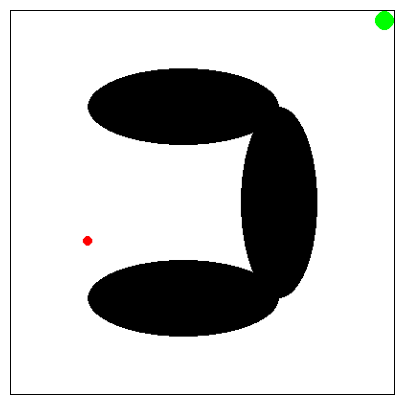

In [9]:
json_file = f"gym_puddle/env_configs/pw4.json"

with open(json_file) as f:
  env_setup = json.load(f)

env = gym.make(
  "PuddleWorld-v0",
  start=env_setup["start"],
  goal=env_setup["goal"],
  goal_threshold=env_setup["goal_threshold"],
  noise=env_setup["noise"],
  thrust=env_setup["thrust"],
  puddle_top_left=env_setup["puddle_top_left"],
  puddle_width=env_setup["puddle_width"],
)

obs, info = env.reset()
image = env.render()
fig, ax = plt.subplots(figsize=(5, 5))
online_rendering(np.transpose(image, (0, 1, 2)))

### Puddle Env with Config 5

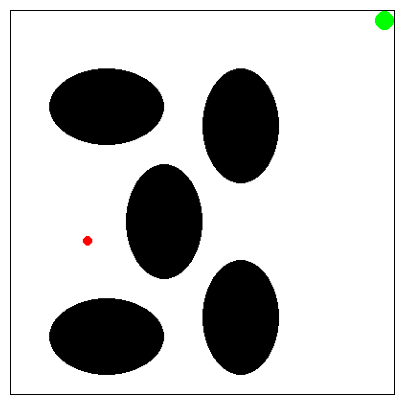

In [10]:
json_file = f"gym_puddle/env_configs/pw5.json"

with open(json_file) as f:
  env_setup = json.load(f)

env = gym.make(
  "PuddleWorld-v0",
  start=env_setup["start"],
  goal=env_setup["goal"],
  goal_threshold=env_setup["goal_threshold"],
  noise=env_setup["noise"],
  thrust=env_setup["thrust"],
  puddle_top_left=env_setup["puddle_top_left"],
  puddle_width=env_setup["puddle_width"],
)

obs, info = env.reset()
image = env.render()
fig, ax = plt.subplots(figsize=(5, 5))
online_rendering(np.transpose(image, (0, 1, 2)))

# 2. Developing the Agents

In preparation for the project, we dive into the exploration of the RL framework through the introduction of three distinct agent types: random, human, and Deep Q-Network (DQN) agents. We will use CNN netowrks to extract features for images of enviornment interations.

## 2.1. DQN Agent

In this section, a  [ Deep Q-Network (DQN) agent](https://arxiv.org/abs/1312.5602) is utilized to interact with the Puddle World environment. The code demonstrates how to set up training with [Stable Baselines](https://stable-baselines3.readthedocs.io/en/master/), a popular library for reinforcement learning. The DQN model is initialized and trained using default hyperparameters, but you can explore and adjust these hyperparameters for optimal performance. After training, the trained model is loaded for evaluation. The environment is initialized, and the DQN agent's interaction with the environment is visualized. The agent selects actions based on the learned policy, and the environment responds accordingly. This process continues until the episode terminates. At the end of the episode, the total reward earned by the agent is displayed, and the sequence of frames captured during the interaction is saved as a video for further analysis. While the provided code serves as a starting point for training a DQN agent with stable baselines if you wish to use this library, you are encouraged to experiment with different hyperparameters to improve the agent's performance in navigating the complex dynamics of the Puddle World environment. We encourage you to explore more algorithms in the same library or build your agents from scratch.

In [8]:
import json
import os

# Define the path to the JSON file
file_path = 'gym_puddle/env_configs'

# Get a list of all files in the directory
all_files = os.listdir(file_path)

# Filter the list to include only JSON files
json_files = [file for file in all_files if file.endswith('.json')]

all_data = {}

# Loop through the JSON files, open each one, and load its content
for json_file in json_files:
    file_path_json = os.path.join(file_path, json_file)
    with open(file_path_json, 'r') as file:
        # Load the JSON content
        data = json.load(file)
        # Store the data using the filename as the key
        all_data[json_file] = data
all_data.keys()

dict_keys(['pw1.json', 'pw2.json', 'pw3.json', 'pw4.json', 'pw5.json', 'pw6.json'])

In [9]:
env_all = []
import random
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines3.common.env_util import make_vec_env

from stable_baselines3.common.monitor import Monitor

def make_env(env_id, config):
    def _init():
        env = Monitor(gym.make(env_id, **config))
        env.reset(seed = 0)
        return env
    return _init

for key, value in all_data.items():
        if key == "pw6.jspn":
             continue
        else:
            env = {"env_id" : "PuddleWorld-v0", 
                "config" : {"start":value["start"],
                "goal":value["goal"],
                "goal_threshold":value["goal_threshold"],
                "noise":value["noise"],
                "thrust":value["thrust"],
                "puddle_top_left":value["puddle_top_left"],
                "puddle_width":value["puddle_width"]
                }}
            env_all.append(env)
env_all_vec = DummyVecEnv([make_env(env["env_id"],env["config"]) for env in env_all])

In [10]:
from typing import Callable

def linear_schedule(initial_value: float) -> Callable[[float], float]:
    """
    Linear learning rate schedule.

    :param initial_value: Initial learning rate.
    :return: schedule that computes
      current learning rate depending on remaining progress
    """
    def func(progress_remaining: float) -> float:
        """
        Progress will decrease from 1 (beginning) to 0.

        :param progress_remaining:
        :return: current learning rate
        """
        if progress_remaining <=0.5 and progress_remaining > 0.25:
            return initial_value/10
        elif progress_remaining <=0.25:
            return initial_value/100
        elif progress_remaining <= 0.75 and progress_remaining> 0.5:
            return initial_value/2
        else:
            return initial_value
        
    return func

In [11]:

# Define the exponential learning rate schedule
def exp_schedule(initial_lr, decay_rate, decay_steps):
    """
    Exponential decay schedule function.

    :param initial_lr: (float) The initial learning rate
    :param decay_rate: (float) The decay rate
    :param decay_steps: (int) Number of steps for each decay
    :return: (function)
    """
    def schedule(progress):
        current_step = (1 - progress) * decay_steps
        return initial_lr * np.exp(-decay_rate * current_step)

    return schedule

In [ ]:
import torch as th
import torch.nn as nn
from gymnasium import spaces

from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

# Custom CNN for the PuddleWorld environment with 3 input channels (RGB) and 256 features in the last layer.
class CustomCNN(BaseFeaturesExtractor):
    """
    :param observation_space: (gym.Space)
    :param features_dim: (int) Number of features extracted.
        This corresponds to the number of unit for the last layer.
    """

    def __init__(self, observation_space: spaces.Box, features_dim: int = 256):
        super().__init__(observation_space, features_dim)
        # We assume CxHxW images (channels first)
        # Re-ordering will be done by pre-preprocessing or wrapper
        n_input_channels = observation_space.shape[0]
        self.cnn = nn.Sequential( # input shape is 3x64x64
            nn.Conv2d(n_input_channels, 32, kernel_size=8, stride=4, padding=0), # output shape is 32x14x14
            nn.ReLU(), # activation function
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=0), # output shape is 64x6x6
            nn.ReLU(), # activation function
            nn.Flatten(), # flatten the output
        )

        # Compute shape by doing one forward pass
        with th.no_grad():
            n_flatten = self.cnn( # input shape is 3x64x64
                th.as_tensor(observation_space.sample()[None]).float()
            ).shape[1]  

        self.linear = nn.Sequential(nn.Linear(n_flatten, features_dim), nn.ReLU()) # the output shape is 256

    def forward(self, observations: th.Tensor) -> th.Tensor:

        return self.linear(self.cnn(observations))

In [ ]:
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.sb2_compat.rmsprop_tf_like import RMSpropTFLike

# Create the evaluation environment
env_eval = Monitor(gym.make(env_all[1]["env_id"],**env_all[1]["config"]))
env_eval.reset(seed = 0)

# Create the callback: check every 1000 steps
eval_callback = EvalCallback(env_eval, best_model_save_path="./logs/",
                             log_path="./logs/", eval_freq=10000,n_eval_episodes =2,
                             deterministic=True, render=False)

## Use CNN to exract features from the images of the environment
policy_kwargs = dict(
    features_extractor_class=CustomCNN,
    features_extractor_kwargs=dict(features_dim=512),
    net_arch = [256, 256]
)

# Create the DQN model
DQN_model = DQN(DQNCnnPolicy, env_all_vec, verbose=1, seed = 0, gamma = 0.9, optimize_memory_usage=True, 
                replay_buffer_kwargs={'handle_timeout_termination': False},
                policy_kwargs=policy_kwargs,batch_size=1024, train_freq=10, 
                gradient_steps=1,max_grad_norm=1.0, exploration_fraction=0.2, exploration_initial_eps=1.0, exploration_final_eps=0.005,
                learning_rate=0.00009, buffer_size=50000)


Using cuda device


## 2.2. Test with one Enviornment config

In [14]:
dqn_model = DQN_model
env_num = 2
env = gym.make(env_all[env_num]["env_id"],**env_all[env_num]["config"])

obs, info = env.reset(seed=1)

# Create an empty list to store the frames
frames = []
episode_rewards = []

for episode in range(1):
  total_reward = 0
  done = False
  num_steps = 0

  while not done and num_steps <=1000: # to avoid infinite loops for the untuned DQN we set a truncation limit, but you should make your agent sophisticated enough to avoid infinite-step episodes
      num_steps +=1
      action, _states = dqn_model.predict(obs)
      obs, reward, done, trunc, info = env.step(action)
      total_reward += reward
      if done == True:
        print("here")

      image = env.render()
      frames.append(image)

      if done:
        print(f"total reward in this episode: {total_reward}")
        episode_rewards.append(total_reward)
        total_reward = 0
        break

env.close()

if episode_rewards == []:
  print("no episode finished in this run.")
else:
  for i, reward in enumerate(episode_rewards):
    print(f"episode {i}: reward: {reward}")

visualize(frames, "DQN_" + str(env_num)+".mp4")


here
total reward in this episode: -26
episode 0: reward: -26


## 2.3. Test with five Puddle Enviornemtn Configuration

In [15]:

dqn_model = DQN_model
test_results = {'env_1': [], 'env_2': [], 'env_3': [], 'env_4': [], 'env_5': []}
for env_num in range(5):
  env = gym.make(env_all[env_num]["env_id"],**env_all[env_num]["config"])

  obs, info = env.reset()

  # Create an empty list to store the frames
  frames = []
  episode_rewards = []

  for episode in range(100):
    total_reward = 0
    done = False
    num_steps = 0

    while not done and num_steps <=1000: # to avoid infinite loops for the untuned DQN we set a truncation limit, but you should make your agent sophisticated enough to avoid infinite-step episodes
        num_steps +=1
        action, _states = dqn_model.predict(obs)
        obs, reward, done, trunc, info = env.step(action)
        total_reward += reward
        if done == True:
          print("here")

        image = env.render()
        frames.append(image)

        if done:
          print(f"total reward in this episode: {total_reward}")
          episode_rewards.append(total_reward)
          total_reward = 0
          break
    env.reset(seed = episode)
  env.close()

  if episode_rewards == []:
    print("no episode finished in this run.")
  else:
    for i, reward in enumerate(episode_rewards):
      print(f"episode {i}: reward: {reward}")

  visualize(frames, "DQN_" + str(env_num)+".mp4")

  name_of_env = "env_" + str(env_num+1)
  test_results[name_of_env] = episode_rewards

here
total reward in this episode: -33
here
total reward in this episode: -31
here
total reward in this episode: -35
here
total reward in this episode: -33
here
total reward in this episode: -35
here
total reward in this episode: -36
here
total reward in this episode: -36
here
total reward in this episode: -36
here
total reward in this episode: -37
here
total reward in this episode: -36
here
total reward in this episode: -39
here
total reward in this episode: -38
here
total reward in this episode: -34
here
total reward in this episode: -35
here
total reward in this episode: -30
here
total reward in this episode: -29
here
total reward in this episode: -35
here
total reward in this episode: -32
here
total reward in this episode: -36
here
total reward in this episode: -35
here
total reward in this episode: -34
here
total reward in this episode: -36
here
total reward in this episode: -35
here
total reward in this episode: -30
here
total reward in this episode: -32
here
total reward in this

In [16]:
len(test_results['env_5'])

100

## 3. Result Format

 

In [ ]:
import pandas as pd

# Assuming you have a list of 100 episodic rewards for each configuration
# Example data structure: [(config1_rewards), (config2_rewards), ...]

# Replace this example data with your actual rewards data
episode_rewards_per_configuration = [
     test_results['env_1'],  # Configuration 1 rewards
    test_results['env_2'],   # Configuration 2 rewards
    test_results['env_3'],  # Configuration 3 rewards
    test_results['env_4'],  # Configuration 4 rewards
   test_results['env_5'],   # Configuration 5 rewards
]

# Define the column names
columns = ['seed_ID', 'ep_reward_pw1', 'ep_reward_pw2', 'ep_reward_pw3', 'ep_reward_pw4', 'ep_reward_pw5']

# Create a list of dictionaries to store data
data = []

# Populate the list with episode IDs and rewards
for episode_id in range(1, 101):  # Assuming 100 episodes
    row_data = {'seed_ID': episode_id}
    for i, rewards in enumerate(episode_rewards_per_configuration):
        row_data[columns[i + 1]] = rewards[episode_id - 1]
    data.append(row_data)

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Define the file name for saving the results
csv_file_name = "./results/test_results.csv"

# Save the DataFrame to a CSV file
df.to_csv(csv_file_name, index=False)

print("Results saved successfully to", csv_file_name)


Results saved successfully to submission.csv


## 4. Data Analysis for the Restuls

In [ ]:
# import "./results/test_results.csv"
import pandas as pd
test_results = pd.read_csv("./results/test_results.csv")


In [16]:
test_results.head()

,seed_ID,ep_reward_pw1,ep_reward_pw2,ep_reward_pw3,ep_reward_pw4,ep_reward_pw5
0,1,-33,-30,-23,-30,-31
1,2,-31,-31,-25,-28,-31
2,3,-35,-35,-26,-30,-32
3,4,-33,-30,-25,-27,-33
4,5,-35,-35,-25,-30,-37


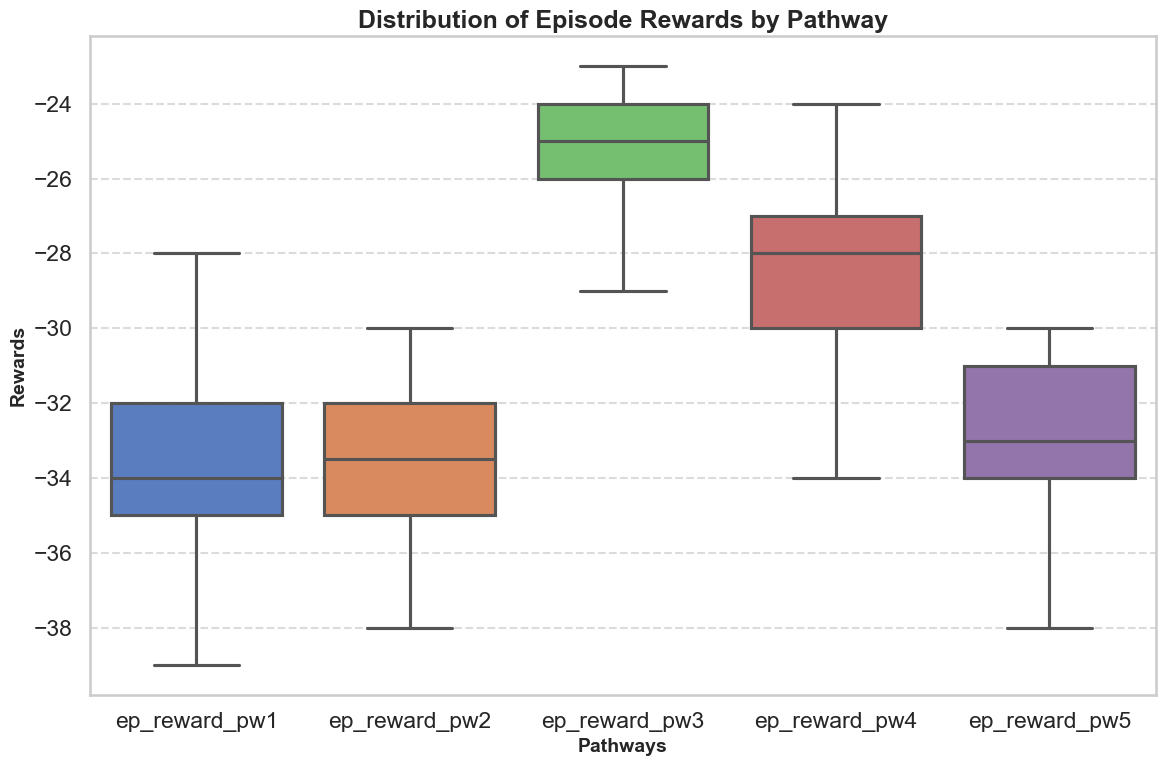

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert DataFrame to long format for Seaborn
test_results_long = test_results.melt(
    id_vars=['seed_ID'], 
    value_vars=['ep_reward_pw1', 'ep_reward_pw2', 'ep_reward_pw3', 'ep_reward_pw4', 'ep_reward_pw5'],
    var_name='Pathway', 
    value_name='Reward'
)

# Set the aesthetic style for the chart
sns.set_theme(style="whitegrid", context="talk")

# Create the figure and boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pathway', y='Reward', data=test_results_long, palette="muted")

# Add titles and labels
plt.title('Distribution of Episode Rewards by Pathway', fontsize=18, weight='bold')
plt.xlabel('Pathways', fontsize=14, weight='bold')
plt.ylabel('Rewards', fontsize=14, weight='bold')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()